# Short Term fourier Transform Scratch

Implementation of the STFT 

- Video Link [STFT](https://www.youtube.com/watch?v=p5dmUfcfrSg)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from scipy.fft import fft, ifft

# plt.style.use('ggplot')

### Definicion de la señal de prueba

## Creacion de una nueva señal chirp

N =  1024


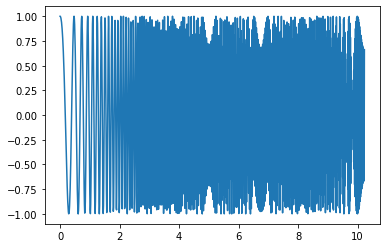

In [13]:
# composicion de nueva señal chirp
f1_ = 1 # Frecuencia inicial del chirp
f2_ = 50 # Frecuencia final del chirp

Fs = 100 # Frecuencia de muestreo

t = np.arange(0,10.24,1/Fs) # vector de tiempos
N_ = len(t)
print("N = ", N_)

x_ = signal.chirp(t, f1_, t[-1], f2_) # Señal sin ventana
x_w = x_*signal.get_window('hamming',len(x_)) # Señal con ventana

# grafico del chirp
plt.plot(t, x_)

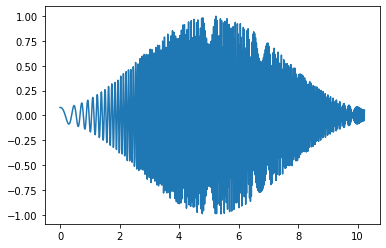

In [14]:
# aplicacion de una ventana hamming a la señal
plt.plot(t,x_w)

### Aplicacion de una transformada simple de Fourier

Primero se le aplicara a la señal sin ventana y luego a la señal con ventana

In [15]:
# FFT de las señales
L = N_

X1n = fft(x_, n = L)
X2n = fft(x_w, n = L)

# se toma solo la cola positiva
X1n_ = np.array(X1n[0:int(L/2)])
X2n_ = np.array(X2n[0:int(L/2)])

freq = freq = Fs*np.arange(0,(L/2))/L

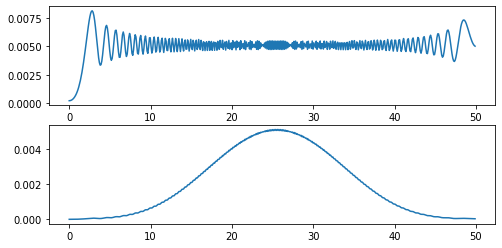

In [16]:
# Power Spectral Density
Pxx = (1/(Fs*L))*(np.abs(X1n_)**2)
Pyy = (1/(Fs*L))*(np.abs(X2n_)**2)

plt.figure(figsize=(8, 4))
plt.subplot(2,1,1)
plt.plot(freq,Pxx)
plt.subplot(2,1,2)
plt.plot(freq,Pyy)

# Creacion de la matriz para STFT

Creacion de la matriz que contendra el mapa de calor para el STFT

### Calcular la STFT

1. Definir la ventana (Tamaño y tipo)

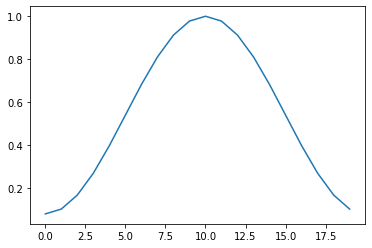

In [17]:
w_size = 20

# Uso de ventana
# w = signal.get_window('boxcar',w_size) # Ventana rectangular
w = signal.get_window('hamming',w_size) # Ventana hamming
# w = signal.get_window('hann',w_size) # Ventana hanning
# w = signal.get_window('blackmanharris',w_size) # Ventana blackmanharris
# w = signal.get_window('barthann',w_size) # Ventana barthann
# w = signal.get_window('tukey',w_size) # Ventana tukey
# w = signal.get_window('taylor',w_size) # Ventana taylor

plt.plot(w)

In [18]:
L_fft = 512
N_t = N_
print("Size time = ", N_t, ", Size FFT = ", L_fft)

my_STFT = np.zeros([L_fft, int(N_t-w_size)])
print("Shape = ", my_STFT.shape)

Size time =  1024 , Size FFT =  512
Shape =  (512, 1004)


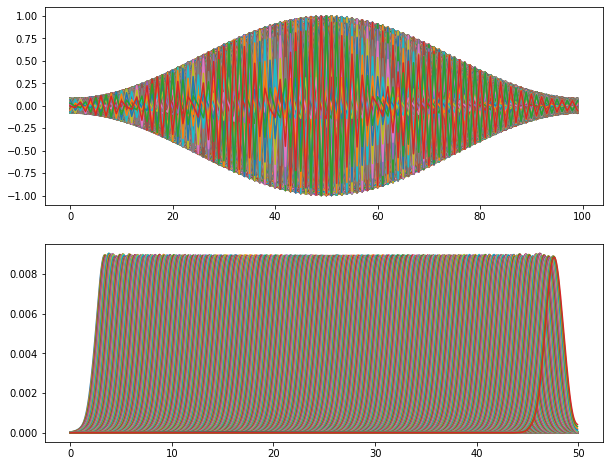

In [30]:
plt.figure(figsize=(10,8))
fr_fft = Fs*np.arange(0,(L_fft))/(2*L_fft)
t_fft = np.arange(0,(N_t-w_size)/Fs, 1/Fs)

for i in range(0,int(N_t-w_size)):
    x_seg = x_[int(i):int((i+w_size))]
    x_seg = x_seg*w

    X_fft = fft(x_seg, n = 2*L_fft) # FFT para dos colas
    X_fft_ = np.array(X_fft[0:L_fft])
    Px_fft = (1/(Fs*L_fft))*(np.abs(X_fft_)**2)
    my_STFT[:,i] = Px_fft

    plt.subplot(2,1,1)
    plt.plot(x_seg)
    plt.subplot(2,1,2)
    plt.plot(fr_fft,Px_fft)

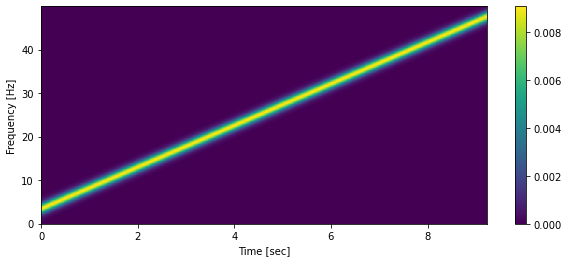

In [31]:
plt.figure(figsize=(10,4))
plt.pcolormesh(t_fft, fr_fft, my_STFT) #, extent=[0, t[-1], 0,int(Fs/2)])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar()

## Prueba resolucion temporal

Size time =  1024 , Size FFT =  512
Shape =  (512, 924)


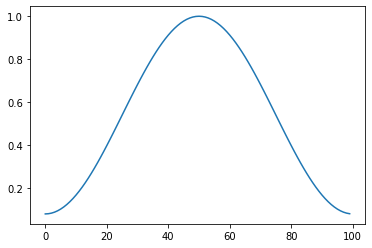

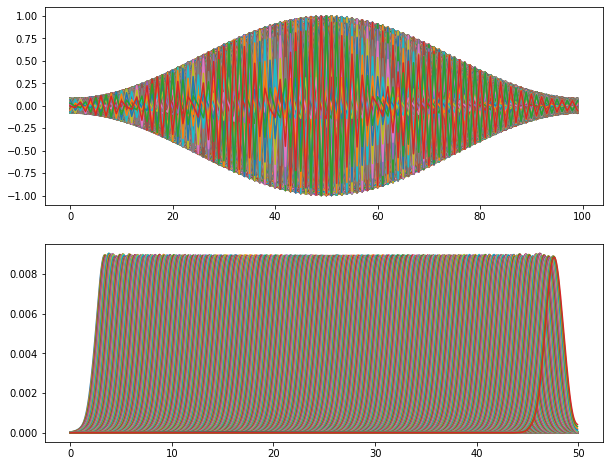

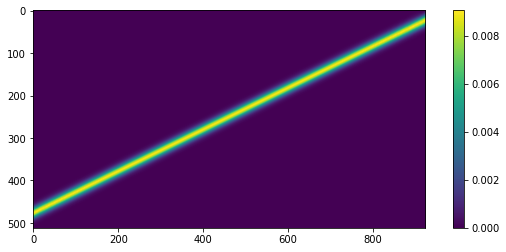

In [27]:
w_size = 100

# Uso de ventana
# w = signal.get_window('boxcar',w_size) # Ventana rectangular
w = signal.get_window('hamming',w_size) # Ventana hamming
# w = signal.get_window('hann',w_size) # Ventana hanning
# w = signal.get_window('blackmanharris',w_size) # Ventana blackmanharris
# w = signal.get_window('barthann',w_size) # Ventana barthann
# w = signal.get_window('tukey',w_size) # Ventana tukey
# w = signal.get_window('taylor',w_size) # Ventana taylor

plt.plot(w)

L_fft = 512
N_t = N_
print("Size time = ", N_t, ", Size FFT = ", L_fft)

my_STFT = np.zeros([L_fft, int(N_t-w_size)])
print("Shape = ", my_STFT.shape)

plt.figure(figsize=(10,8))
for i in range(0,int(N_t-w_size)):
    x_seg = x_[int(i):int((i+w_size))]
    x_seg = x_seg*w

    X_fft = fft(x_seg, n = 2*L_fft) # FFT para dos colas
    X_fft_ = np.array(X_fft[0:L_fft])
    fr_fft = Fs*np.arange(0,(L_fft))/(2*L_fft)
    Px_fft = (1/(Fs*L_fft))*(np.abs(X_fft_)**2)

    my_STFT[:,i] = np.flip(Px_fft)

    plt.subplot(2,1,1)
    plt.plot(x_seg)
    plt.subplot(2,1,2)
    plt.plot(fr_fft,Px_fft)

plt.figure(figsize=(10,4))
plt.imshow(my_STFT) #, extent=[0, t[-1], 0,int(Fs/2)])
plt.colorbar()